In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
plt.rc('font', size=18)
import cartopy.crs as ccrs
import xarray as xr

In [2]:
DIR = '/volstore/spacebridge/spacebridge_csv'
files = [os.path.join(DIR,pth) for pth in os.listdir(DIR)]
files.sort()
files

['/volstore/spacebridge/spacebridge_csv/MLTraining_202002.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202003.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202004.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202005.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202006.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202007.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202008.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202009.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202010.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202011.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202012.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202101.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202102.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202103.csv',
 '/volstore/spacebridge/spacebridge_csv/MLTraining_202104.csv',
 '/volstore/spacebridge/spacebridge_csv/

In [58]:
class GNSS_meta(object):
    def __init__(self, path):
        self.path = path
        self.year = os.path.basename(os.path.splitext(self.path)[0])[-6:-2]
        self.mon = os.path.basename(os.path.splitext(self.path)[0])[-2:]
        self.load()
    def load(self):
        self.data = pd.read_csv(self.path, usecols = [1,2,3])
        try:
            iceconc_mean = xr.open_dataset(f'/volstore/spacebridge/iceconc_osisaf/{self.year}/{self.mon}/ice_conc_sh_polstere-100_multi_{self.year}{self.mon}_monmean.nc')
            iceedge = pd.DataFrame({'lon': iceconc_mean.ice_conc.lon.data.flatten(),
                            'lat': iceconc_mean.ice_conc.lat.data.flatten(),
                            'edge': iceconc_mean.ice_conc.data.flatten()})
            iceedge = iceedge[(iceedge['edge'] > 14.5) & (iceedge['edge'] < 15.5)] 
            iceedge.sort_values(by='lon',inplace=True)
            self.iceedge = iceedge
        except FileNotFoundError as fnf_error:
            self.iceedge = None
            print(fnf_error)
    def __str__(self):
        return str(self.data.head())
    def __repr__(self):
        return str(self)
    def __len__(self):
        return len(self.data)
    def set_extent(self, lat1, lat2, lon1=-180, lon2=180):
        assert lon1 < lon2, 'lon1 must be smaller than lon2'
        assert lat1 < lat2, 'lat1 must be smaller than lat2'
        self.data = self.data[(self.data['latitude'] > lat1) & (self.data['latitude'] <= lat2) & (self.data['longtiude'] > lon1) & (self.data['longtiude'] <= lon2)]
    def plot(self, fig=None, ax=None, legend=True):
        if fig is None:
            fig = plt.figure()
            ax = plt.axes(projection=ccrs.Orthographic(0,-90))
            ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree())
        else:
            assert ax is not None, 'Axes must be provided for multi-panel plot'
        im = ax.hexbin(x=self.data['longtiude'], y=self.data['latitude'], gridsize=(3*36,3*18), cmap='Greens', transform=ccrs.PlateCarree())
        fig.colorbar(im, label='hexbins of number of\nGNSS scatterometer pings', ax=ax)
        ax.set_title(f'{self.year} {self.mon}')
        ax.coastlines()
        if self.iceedge is not None:
            ax.plot(self.iceedge.lon,self.iceedge.lat,label='Antarctic ice edge', transform=ccrs.PlateCarree())
            if legend:
                ax.legend()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/stefan/mambaforge/envs/spacebridge/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/stefan/mambaf

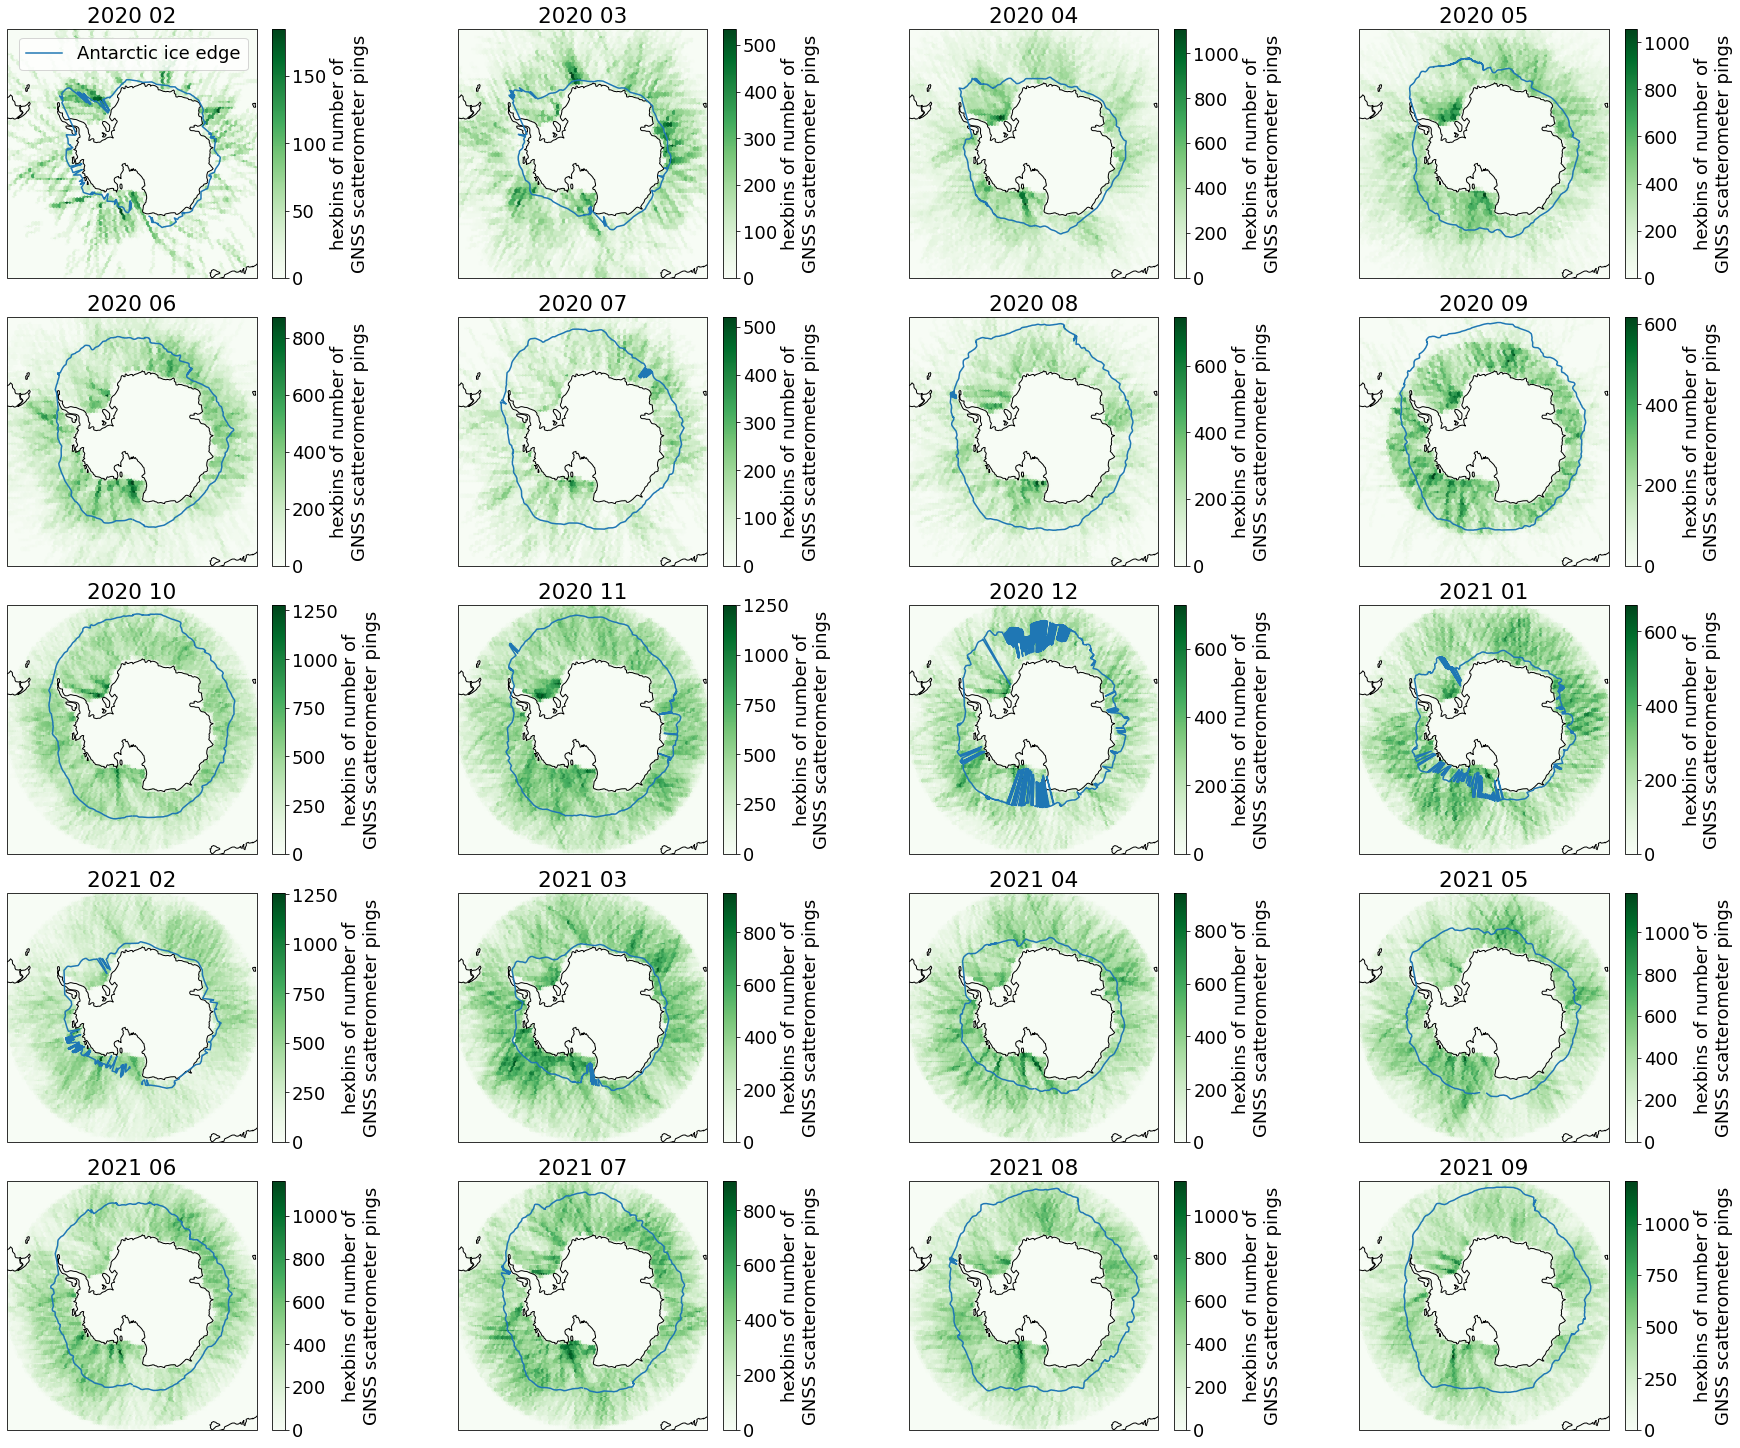

In [60]:
PATHS = files
fig, axs = plt.subplots(ncols=4, nrows=5, constrained_layout=True, subplot_kw={'projection':ccrs.Orthographic(0,-90)})
for k, ax in enumerate(axs.flatten()):
    print(k)
    ax.set_extent([-180,180,-50,-90], crs=ccrs.PlateCarree())
    GNSS = GNSS_meta(PATHS[k])
    legend = True if k == 0 else False
    GNSS.plot(fig=fig, ax=ax, legend=legend)

In [86]:
GNSS_202103.set_extent(-90, 0)
len(GNSS_202103)

116017

### ice concentration edge

In [8]:
iceconc_max = xr.open_dataset('/volstore/spacebridge/iceconc_osisaf/2021/09/ice_conc_sh_polstere-100_multi_202109_monmax.nc')
iceconc_mean = xr.open_dataset('/volstore/spacebridge/iceconc_osisaf/2021/09/ice_conc_sh_polstere-100_multi_202109_monmean.nc')
iceconc_max

<xarray.Dataset>
Dimensions:                   (time: 1, bnds: 2, yc: 830, xc: 790)
Coordinates:
  * time                      (time) datetime64[ns] 2021-09-16
    lon                       (yc, xc) float32 ...
    lat                       (yc, xc) float32 ...
  * xc                        (xc) float64 -3.945e+03 -3.935e+03 ... 3.945e+03
  * yc                        (yc) float64 4.345e+03 4.335e+03 ... -3.945e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds                 (time, bnds) datetime64[ns] ...
    Polar_Stereographic_Grid  int32 ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/33)
    CDI:                     Climate Data Interface version 1.9.9rc1 (https:/...
    Conventions:             CF-1.6
    history:                 Fri Dec 10 00:55:30 2021: cdo monmax ice_conc_sh...
    institution:             EUMETSAT OSI SAF
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    frequency:               mon
    CDO:                     Climate Data Operators version 1.9.9rc1 (https:/...

In [29]:
len(iceconc_mean.ice_conc.data.flatten())

655700

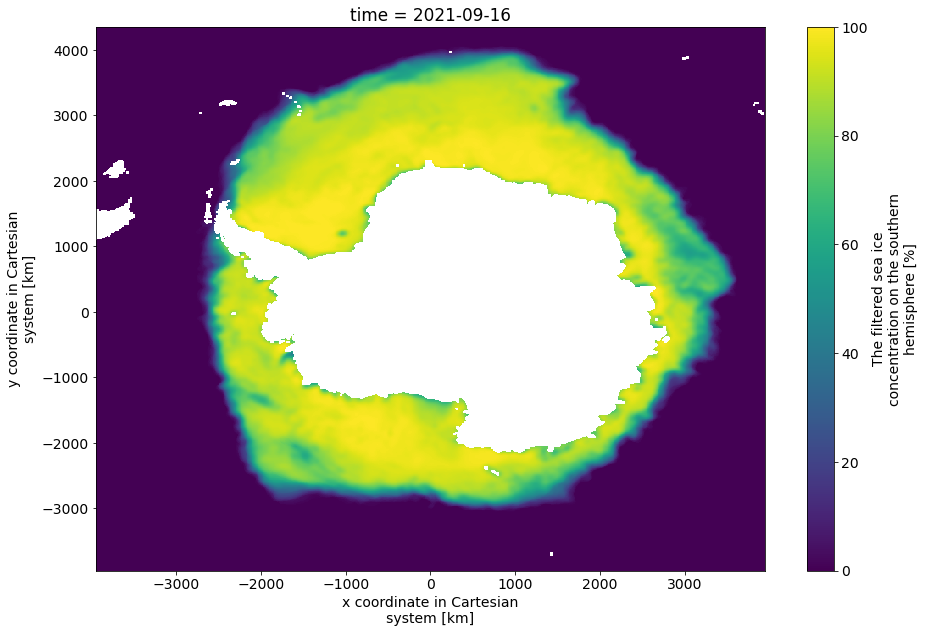

In [16]:
iceconc_mean.ice_conc.where(icecon_mean.ice_conc == plot()

In [10]:
iceedge = pd.DataFrame({'lon': iceconc_mean.ice_conc.lon.data.flatten(),
                        'lat': iceconc_mean.ice_conc.lat.data.flatten(),
                        'edge': iceconc_mean.ice_conc.data.flatten()})
iceedge = iceedge[(iceedge['edge'] > 14.5) & (iceedge['edge'] < 15.5)] 
iceedge.sort_values(by='lon',inplace=True)
zip(iceedge.lon, iceedge.lat)

# Exploratory